# What happens if chess players make random moves?
### By Rokuto and Tom

This notebook was made in one morning by Rokuto and Tom for fun in late March, 2020. In it, we simulate 10,000 chess games with random moves taken by both players. We wanted to know whether such games ever end and, if so, after how many moves?

According to an online database of 946,503 chess games, the average number of moves in a game played by humans is about 41 (https://www.chessgames.com/chessstats.html).

In [1]:
import chess
import random
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 200
plt.rcParams['figure.facecolor'] = 'w'

In [2]:
number_of_games_to_test = 10_000
max_allowable_moves = 1_000_000
draws_50moves = 0
draws_50moves_moves = []
draws_3rep = 0
draws_3rep_moves = []
draws_insufficientmat = 0
draws_insufficientmat_moves = []
stalemates = 0
stalemates_moves = []
checkmates = 0
checkmating_piece = []
white_wins = 0
checkmate_boards = []
checkmates_moves = []
super_long_games = 0

In [3]:
for game in range(0,number_of_games_to_test):
    if game % 1_000 == 0:
        print("Simulating game",game)
    board = chess.Board()
    for i in range(0, max_allowable_moves):
        legal_moves = []
        for j in board.legal_moves:
            legal_moves.append(j)
        len_legal_moves = len(legal_moves)
        random_move = chess.Move.from_uci(str(random.choice(legal_moves)))
        #print("make move:",random_move)
        board.push(random_move)
        #print(board)
        if board.is_checkmate():
            #print ("Checkmate after", i+1, "moves")
            checkmates += 1
            checkmates_moves.append(i+1)
            checkmating_piece.append((str(board.piece_at(list(board.checkers())[0]))))
            checkmate_boards.append(board.fen(shredder=True))
            if not board.turn:
                white_wins += 1
            break
        elif board.can_claim_fifty_moves():
            #print ("Draw by 50-move rule after", i+1, "moves")
            draws_50moves += 1
            draws_50moves_moves.append(i+1)
            break
        elif board.can_claim_threefold_repetition():
            #print ("Draw by threehold repetition after", i+1, "moves")
            draws_3rep += 1
            draws_3rep_moves.append(i+1)
            break
        elif board.is_insufficient_material():
            draws_insufficientmat += 1
            draws_insufficientmat_moves.append(i+1)
            break
        elif board.is_stalemate():
            stalemates += 1
            stalemates_moves.append(i+1)
            break
        elif i == max_allowable_moves:
            #print("Max allowable moves after", i+1, "moves")
            super_long_games += 1

Simulating game 0
Simulating game 1000
Simulating game 2000
Simulating game 3000
Simulating game 4000
Simulating game 5000
Simulating game 6000
Simulating game 7000
Simulating game 8000
Simulating game 9000


In [18]:
# print("White win rate in checkmates:", white_wins/checkmates) ### UNCOMMENT THIS!
# in the latest simulation, the code block above had: if board.turn instead of if not board.turn
# since simulating 10_000 games takes a while, I'll just invert this simulation's result
print("White win rate in checkmates", np.abs(white_wins/checkmates - 1)) ### COMMENT THIS!

White win rate in checkmates 0.5220883534136547


In [5]:
print("Number of draws by 50-move rule:", draws_50moves, "or", draws_50moves/number_of_games_to_test, "of all games")
print("Number of draws by 3-fold repetition rule:", draws_3rep, "or", draws_3rep/number_of_games_to_test, "of all games")
print("Number of draws by insufficient material:", draws_insufficientmat, "or", draws_insufficientmat/number_of_games_to_test, "of all games")
print("Number of stalemates:", stalemates, "or", stalemates/number_of_games_to_test, "of all games")
print("Number of checkmates:", checkmates, "or", checkmates/number_of_games_to_test, "of all games")
print("Number of super long games:", super_long_games, "or", super_long_games/number_of_games_to_test, "of all games")

Number of draws by 50-move rule: 1717 or 0.1717 of all games
Number of draws by 3-fold repetition rule: 1485 or 0.1485 of all games
Number of draws by insufficient material: 4781 or 0.4781 of all games
Number of stalemates: 523 or 0.0523 of all games
Number of checkmates: 1494 or 0.1494 of all games
Number of super long games: 0 or 0.0 of all games


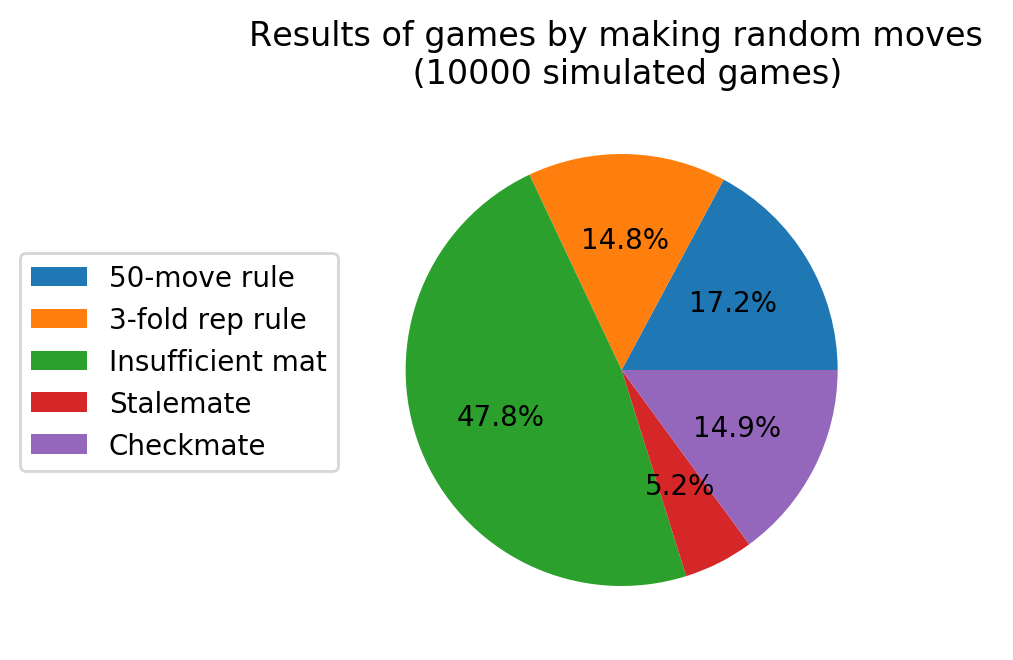

In [6]:
plt.title("Results of games by making random moves \n (%i simulated games)" %number_of_games_to_test)
plt.pie([draws_50moves, draws_3rep, draws_insufficientmat, stalemates, checkmates], autopct='%1.1f%%')
plt.legend(labels=["50-move rule", "3-fold rep rule", "Insufficient mat", "Stalemate", "Checkmate"],
           bbox_to_anchor=(0,0.5), loc="center right", fontsize=10, bbox_transform=plt.gcf().transFigure)
plt.subplots_adjust(left=0.0, bottom=0.1, right=0.45)
plt.show()

In [7]:
pawn = 0
knight = 0
bishop = 0
rook = 0
queen = 0
for i in checkmating_piece:
    if i == 'p' or i == "P":
        pawn += 1
    elif i == 'n' or i == 'N':
        knight += 1
    elif i == 'b' or i == 'B':
        bishop += 1
    elif i == 'r' or i == 'R':
        rook += 1
    elif i == 'q' or i == 'Q':
        queen += 1

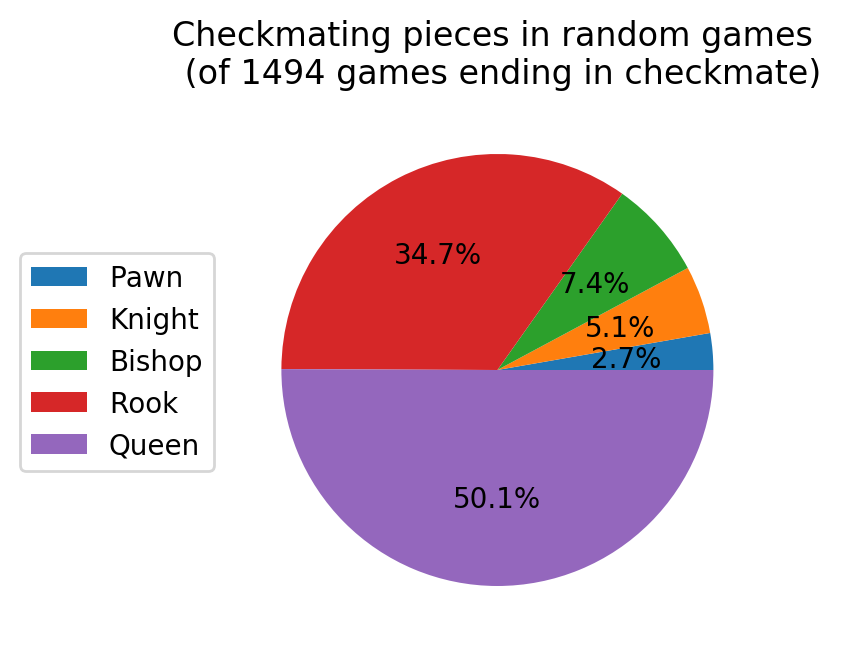

In [8]:
plt.title("Checkmating pieces in random games \n (of %i games ending in checkmate)" %checkmates)
plt.pie([pawn, knight, bishop, rook, queen], autopct='%1.1f%%')
plt.legend(labels=["Pawn", "Knight", "Bishop", "Rook", "Queen"], bbox_to_anchor=(0,0.5), 
           loc="center right", fontsize=10, bbox_transform=plt.gcf().transFigure)
plt.subplots_adjust(left=0.0, bottom=0.1, right=0.45)
plt.show()

In [9]:
print("Average number of moves after draw by 50-move rule:", np.mean(draws_50moves_moves))
print("Average number of moves after draw by 3-fold repetition rule:", np.mean(draws_3rep_moves))
print("Average number of moves after draw by insufficient material:", np.mean(draws_insufficientmat_moves))
print("Average number of moves after stalemate:", np.mean(stalemates_moves))
print("Average number of moves after checkmate:", np.mean(checkmates_moves))

Average number of moves after draw by 50-move rule: 414.62085032032616
Average number of moves after draw by 3-fold repetition rule: 331.006734006734
Average number of moves after draw by insufficient material: 357.14578540054384
Average number of moves after stalemate: 291.5353728489484
Average number of moves after checkmate: 160.6867469879518


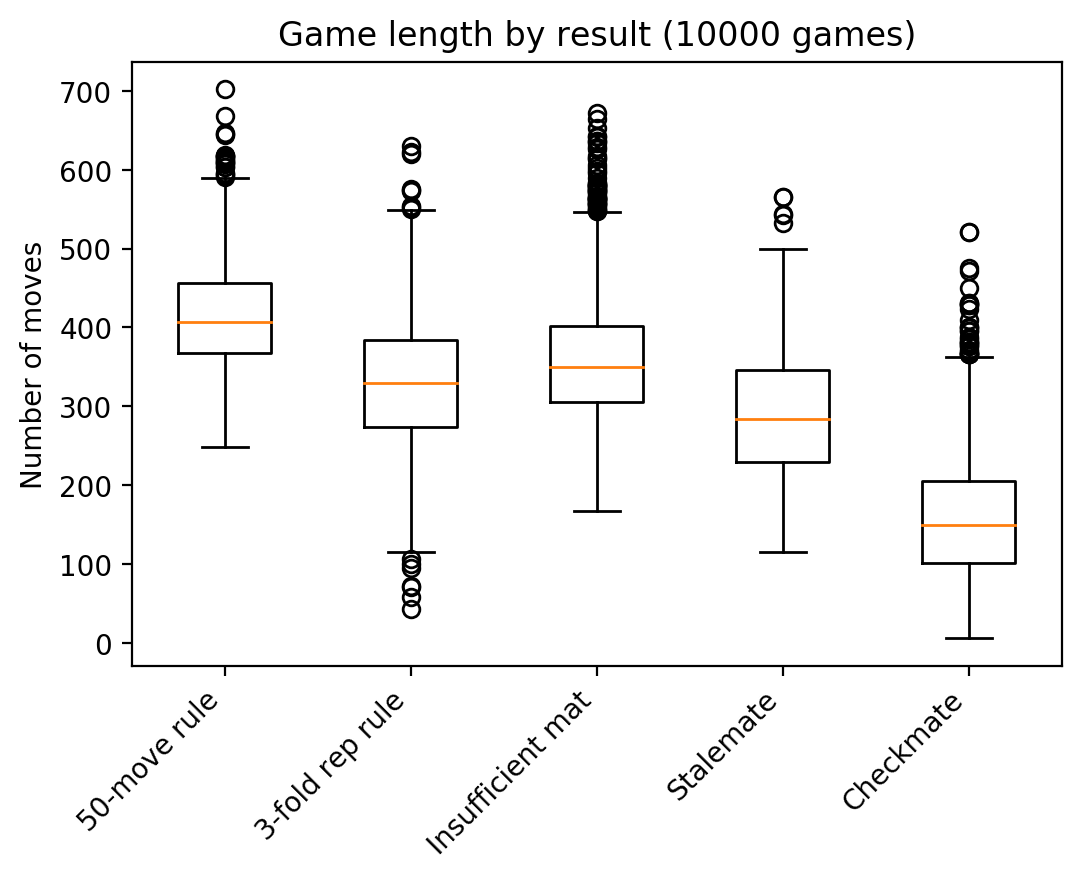

In [10]:
plt.title("Game length by result (%i games)" %number_of_games_to_test)
plt.boxplot([draws_50moves_moves, draws_3rep_moves, draws_insufficientmat_moves, 
             stalemates_moves, checkmates_moves], 
            labels=["50-move rule", "3-fold rep rule", "Insufficient mat", "Stalemate", "Checkmate"])
plt.ylabel("Number of moves")
plt.xticks(rotation=45, ha='right')
plt.show()

In [11]:
longest_game = np.max([np.max(draws_50moves_moves), np.max(draws_3rep_moves),
                       np.max(draws_insufficientmat_moves), np.max(stalemates_moves),
                       np.max(checkmates_moves)])
num_bins = 25

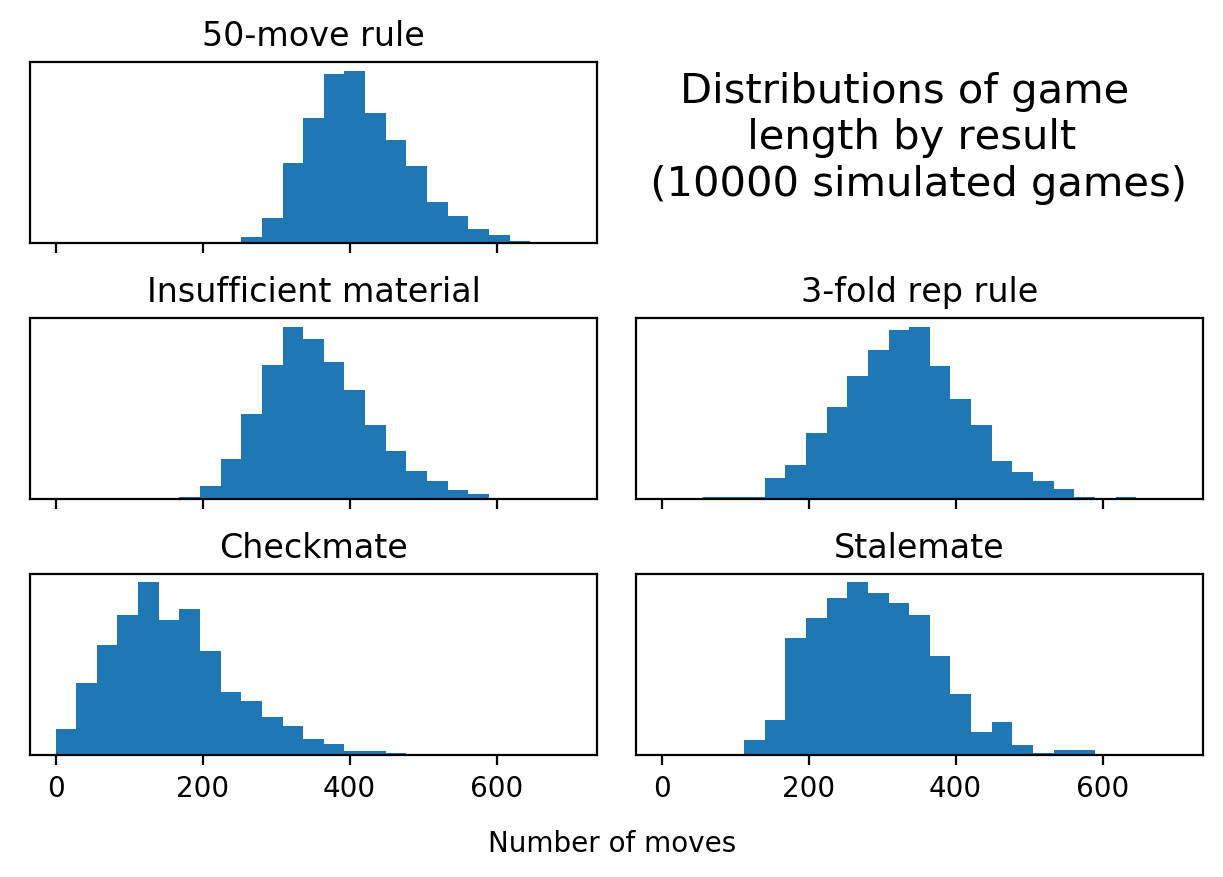

In [12]:
fig, axs = plt.subplots(3,2, constrained_layout=True, sharex=True)

axs[0,0].set_title("50-move rule")
axs[0,0].get_yaxis().set_visible(False)
axs[0,0].hist(draws_50moves_moves, bins=num_bins, range=(0,longest_game))

axs[0,1].set_visible(False)

axs[1,1].set_title("3-fold rep rule")
axs[1,1].get_yaxis().set_visible(False)
axs[1,1].hist(draws_3rep_moves, bins=num_bins, range=(0,longest_game))

axs[1,0].set_title("Insufficient material")
axs[1,0].get_yaxis().set_visible(False)
axs[1,0].hist(draws_insufficientmat_moves, bins=num_bins, range=(0,longest_game))

axs[2,1].set_title("Stalemate")
axs[2,1].get_yaxis().set_visible(False)
axs[2,1].hist(stalemates_moves, bins=num_bins, range=(0,longest_game))

axs[2,0].set_title("Checkmate")
axs[2,0].get_yaxis().set_visible(False)
axs[2,0].hist(checkmates_moves, bins=num_bins, range=(0,longest_game))

fig.text(0.75, 0.77, 
         "Distributions of game \n length by result \n (%i simulated games)" %number_of_games_to_test,
         ha='center', size=15)
fig.text(0.5, -0.05, 'Number of moves', ha='center')
plt.show()

In [13]:
checkmate_boards

['5b2/6pr/3pQ1k1/pPp2p1p/4pPb1/4P1PP/nn1PN3/2B1KB1R b - - 1 34',
 '1N3bn1/1p1Qppr1/r2k2pp/p2p2PP/P2P4/R1P5/1P3P2/1BBK2R1 b - - 0 32',
 '1rk5/1p5p/1P6/2p5/b1p5/N1Bnb1nP/P1PP2P1/4RKR1 w - - 0 40',
 '1r2k1nr/4p3/1pn1Q2p/p4p2/P2b1P1P/2p1K3/R4NP1/B2q1BR1 w - - 0 31',
 'R5n1/6rk/6p1/2p2rKp/BN5P/p4PP1/8/5b2 w - - 19 81',
 'n1k2r2/p5N1/2p5/PP2br1p/2p4K/2P2P2/1B5q/5b2 w - - 5 64',
 '8/4r3/P5Q1/2P3pk/1pP1B1p1/P6p/nK3B1P/2Rb4 b - - 2 56',
 'Q7/1R6/7B/k1rn1p2/3p1Pb1/1K6/8/8 b - - 0 94',
 'k7/P4P2/3p4/7p/2p3qK/8/1Nb2r2/8 w - - 1 84',
 '2n2r1k/5Q2/2p1bB1p/p2rP2P/3n4/Rq1P2KR/2P5/8 b - - 9 48',
 '8/n1k5/6N1/p7/P6b/K1q5/8/1b6 w - - 6 148',
 '5R2/1P6/8/p5kp/P2B2b1/5K2/2r4q/4r3 w - - 2 102',
 '1k1R4/7K/1P4R1/3B4/1P6/4p3/5n2/8 b - - 0 118',
 '2R4k/3B4/7K/8/8/8/8/8 b - - 62 170',
 '3k4/3Q4/4P2P/4p3/R7/8/K1B5/6n1 b - - 14 113',
 'rn2k1nr/p1pp1p1p/4p3/1p2P3/P4pPb/3b1P2/1PPP4/RNBQKB2 w Aha - 0 13',
 '1nb1kb1r/rpNp1pp1/2N1pq1n/8/p1p4P/3P4/PPP1PPPR/RQ2KB2 b Ah - 1 11',
 '5Q2/8/1N2k1pb/1b4P1/3R4/5n1B/4p1QB/1K6 b